<a href="https://colab.research.google.com/github/divya875/Python/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                  Null Count
Feature                                     
MINIMUM_PAYMENTS                         313
CREDIT_LIMIT                               1
TENURE                                     0
PURCHASES_FREQUENCY                        0
BALANCE                                    0
BALANCE_FREQUENCY                          0
PURCHASES                                  0
ONEOFF_PURCHASES                           0
INSTALLMENTS_PURCHASES                     0
CASH_ADVANCE                               0
ONEOFF_PURCHASES_FREQUENCY                 0
PRC_FULL_PAYMENT                           0
PURCHASES_INSTALLMENTS_FREQUENCY           0
CASH_ADVANCE_FREQUENCY                     0
CASH_ADVANCE_TRX                           0
PURCHASES_TRX                              0
PAYMENTS                                   0
CUST_ID                                    0
Silhoutte Score without PCA: 0.2502329092671986


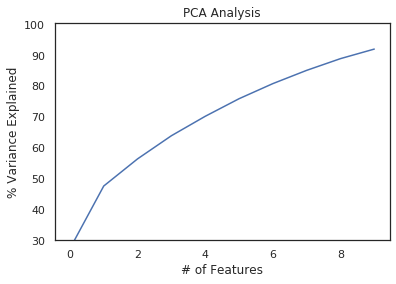

Silhoutte Score After PCA: 0.2951683987631998


In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

dataset = pd.read_csv('CC.csv')
x = dataset

## Null values
nulls = pd.DataFrame(x.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

## Replacing null values with mean values
x = x.select_dtypes(include=[np.number]).interpolate().dropna()


# Standradising the data features
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x)
X_scaled_array = scaler.transform(x)
X_scaled = pd.DataFrame(X_scaled_array, columns = x.columns)

# Building the model
from sklearn.cluster import KMeans
nclusters = 3 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(X_scaled)

# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
print("Silhoutte Score without PCA: " + str(score))


# Create a Covariance Matrix
covar_matrix = PCA(10)
covar_matrix.fit(X_scaled)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)
plt.show()

# Reducing the dimensionality from 3 to 2 using PCA
pca = PCA(6)
x_pca = pca.fit_transform(X_scaled)
df2 = pd.DataFrame(data=x_pca)

# Building the model after Dimensionality redcution
nclusters = 3 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(df2)

#Bonus
# predict the cluster for each data point after applying PCA.
y_cluster_kmeans = km.predict(df2)
score = metrics.silhouette_score(df2, y_cluster_kmeans)
print("Silhoutte Score After PCA: " + str(score))